In [315]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [316]:
df = pd.read_csv('Datasets/NIFTY 50 - Minute data.csv')

In [317]:
df.head()

,date,open,high,low,close,volume
0,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0
1,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0
2,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0
3,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0
4,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0


In [318]:
# Assuming 'df' is your DataFrame with 1-minute data
df['date'] = pd.to_datetime(df['date'])

# Set 'timestamp' as the index of the DataFrame
df.set_index('date', inplace=True)

# Resample the data to 5-minute frequency and aggregate OHLC
dataset = df.resample('5T').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last'})

# Handle any missing data (if any)
dataset.dropna(inplace=True)

# Optionally, you can do further processing or analysis here

# Print the 5-minute OHLC data
print(dataset)

C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_27540\498626161.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dataset = df.resample('5T').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last'})


                         open      high       low     close
date                                                       
2015-01-09 09:15:00   8285.45   8301.30   8285.45   8301.20
2015-01-09 09:20:00   8300.50   8303.00   8293.25   8301.00
2015-01-09 09:25:00   8301.65   8302.55   8286.80   8294.15
2015-01-09 09:30:00   8294.10   8295.75   8280.65   8288.50
2015-01-09 09:35:00   8289.10   8290.45   8278.00   8283.45
...                       ...       ...       ...       ...
2024-01-25 15:05:00  21321.45  21357.35  21321.45  21346.45
2024-01-25 15:10:00  21347.40  21360.00  21335.05  21343.30
2024-01-25 15:15:00  21343.05  21360.70  21339.45  21352.65
2024-01-25 15:20:00  21352.65  21380.35  21352.65  21378.20
2024-01-25 15:25:00  21376.55  21401.75  21367.40  21370.75

[167366 rows x 4 columns]


In [319]:
# Read 5 minute data
# dataset = pd.read_csv('Datasets/NIFTY_5min_jan_2015_oct_2022.csv')
# dataset.head()

In [320]:
dataset.isnull().sum()

open     0
high     0
low      0
close    0
dtype: int64

In [321]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167366 entries, 2015-01-09 09:15:00 to 2024-01-25 15:25:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    167366 non-null  float64
 1   high    167366 non-null  float64
 2   low     167366 non-null  float64
 3   close   167366 non-null  float64
dtypes: float64(4)
memory usage: 6.4 MB


In [322]:
dataset['EMA30'] = dataset['close'].ewm(span=30, adjust=False).mean()

In [323]:
dataset.head(10)

,open,high,low,close,EMA30
date,,,,,
2015-01-09 09:15:00,8285.45,8301.30,8285.45,8301.20,8301.200000
2015-01-09 09:20:00,8300.50,8303.00,8293.25,8301.00,8301.187097
2015-01-09 09:25:00,8301.65,8302.55,8286.80,8294.15,8300.733091
2015-01-09 09:30:00,8294.10,8295.75,8280.65,8288.50,8299.943859
2015-01-09 09:35:00,8289.10,8290.45,8278.00,8283.45,8298.879739
2015-01-09 09:40:00,8283.40,8288.30,8277.40,8285.55,8298.019756
2015-01-09 09:45:00,8285.40,8287.65,8278.05,8283.75,8297.099126
2015-01-09 09:50:00,8283.80,8284.25,8273.95,8276.25,8295.754021
2015-01-09 09:55:00,8275.95,8283.60,8275.05,8282.00,8294.866665


#### α= 2/(N+1) = 2/(30+1) = 0.0645
#### EMA current =(Close current −EMA previous)×α+EMA previous
​


In [324]:
df = dataset.iloc[0:300]

In [325]:
df.head()

,open,high,low,close,EMA30
date,,,,,
2015-01-09 09:15:00,8285.45,8301.30,8285.45,8301.20,8301.200000
2015-01-09 09:20:00,8300.50,8303.00,8293.25,8301.00,8301.187097
2015-01-09 09:25:00,8301.65,8302.55,8286.80,8294.15,8300.733091
2015-01-09 09:30:00,8294.10,8295.75,8280.65,8288.50,8299.943859
2015-01-09 09:35:00,8289.10,8290.45,8278.00,8283.45,8298.879739


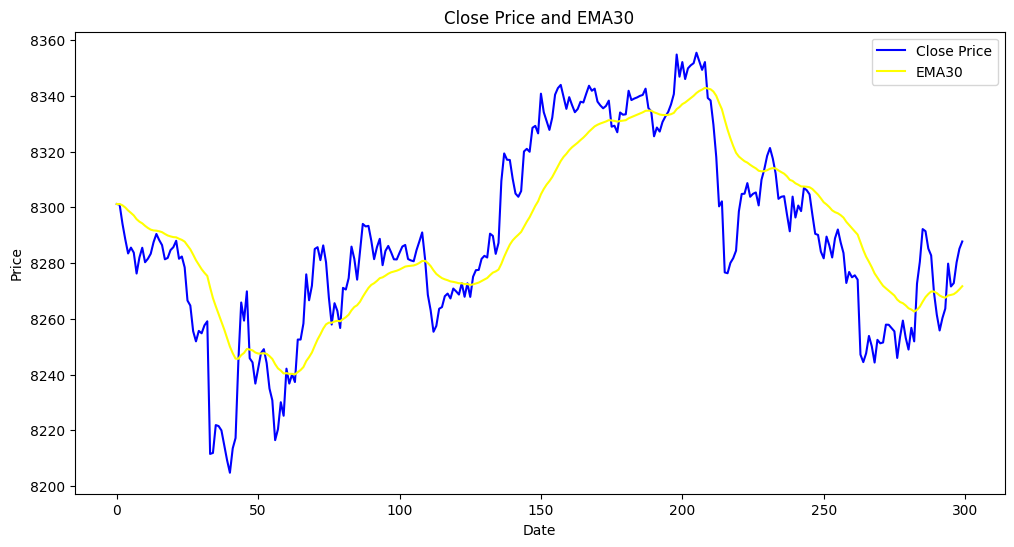

In [326]:
df.reset_index(inplace=True)

plt.figure(figsize=(12, 6))  # Optional: to make the plot larger
plt.plot(df['close'], color='blue', label='Close Price')
plt.plot(df['EMA30'], color='yellow', label='EMA30')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and EMA30')
plt.show()

In [327]:
len(dataset)

167366

#### Find the bullish engulfing 

In [328]:
# Identify Bullish Engulfing Patterns
dataset['previous_close'] = dataset['close'].shift(1)
dataset['previous_open'] = dataset['open'].shift(1)

dataset['bullish_engulfing'] = ((dataset['previous_close'] < dataset['previous_open']) & 
                           (dataset['close'] > dataset['open']) & 
                           (dataset['close'] > dataset['previous_open']) & 
                           (dataset['open'] < dataset['previous_close']))

### Find the Bearish engulfing

In [329]:
dataset['bearish_engulfing'] = ((dataset['previous_close'] > dataset['previous_open']) & 
                           (dataset['close'] < dataset['open']) & 
                           (dataset['close'] < dataset['previous_open']) & 
                           (dataset['open'] > dataset['previous_close']))

In [330]:
dataset.head(5)

,open,high,low,close,EMA30,previous_close,previous_open,bullish_engulfing,bearish_engulfing
date,,,,,,,,,
2015-01-09 09:15:00,8285.45,8301.30,8285.45,8301.20,8301.200000,NaN,NaN,False,False
2015-01-09 09:20:00,8300.50,8303.00,8293.25,8301.00,8301.187097,8301.20,8285.45,False,False
2015-01-09 09:25:00,8301.65,8302.55,8286.80,8294.15,8300.733091,8301.00,8300.50,False,True
2015-01-09 09:30:00,8294.10,8295.75,8280.65,8288.50,8299.943859,8294.15,8301.65,False,False
2015-01-09 09:35:00,8289.10,8290.45,8278.00,8283.45,8298.879739,8288.50,8294.10,False,False


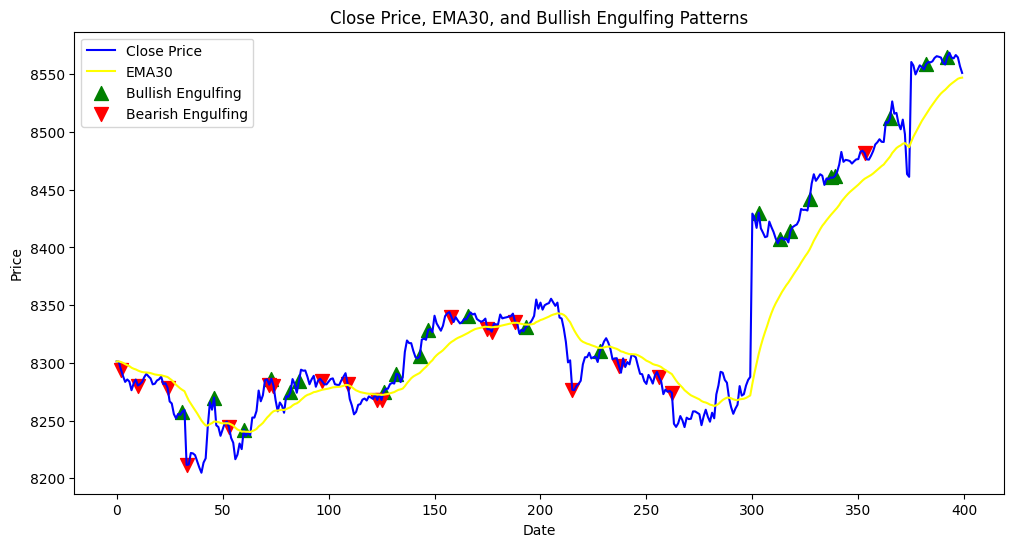

In [331]:
from matplotlib import pyplot as plt

dataset.reset_index(inplace=True)
df = dataset[:400]
# Plotting
plt.figure(figsize=(12, 6))  # Optional: to make the plot larger
plt.plot(df['close'], color='blue', label='Close Price')
plt.plot(df['EMA30'], color='yellow', label='EMA30')

# Plot Bullish Engulfing Patterns
bullish_engulfing = df[df['bullish_engulfing']]
plt.scatter(bullish_engulfing.index, bullish_engulfing['close'], 
            color='green', marker='^', s=100, label='Bullish Engulfing')

# Plot Bearish Engulfing Patterns
bearish_engulfing = df[df['bearish_engulfing']]
plt.scatter(bearish_engulfing.index, bearish_engulfing['close'], 
            color='red', marker='v', s=100, label='Bearish Engulfing')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price, EMA30, and Bullish Engulfing Patterns')
plt.show()

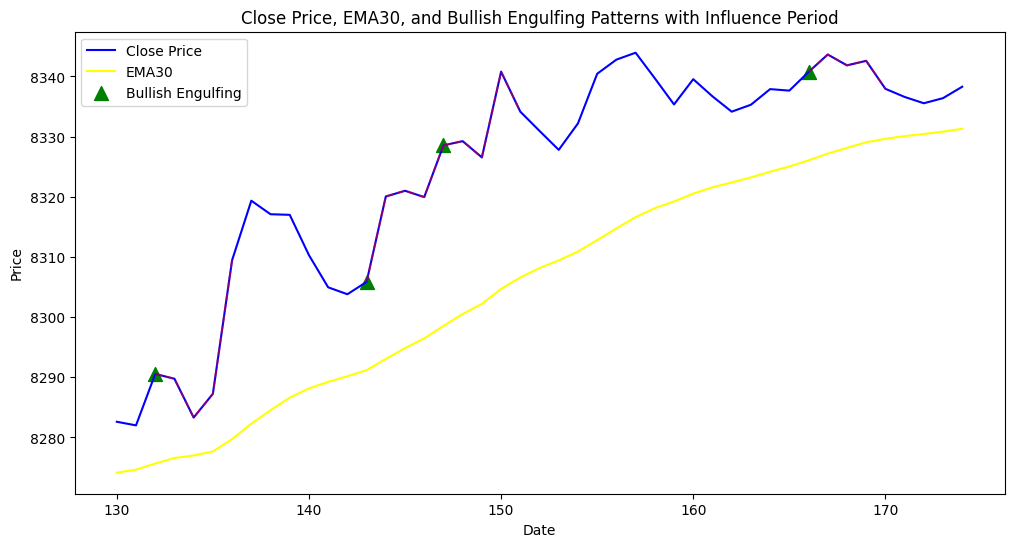

In [332]:
df = dataset[130:175]

# Plotting
plt.figure(figsize=(12, 6))  # Optional: to make the plot larger
plt.plot(df['close'], color='blue', label='Close Price')
plt.plot(df['EMA30'], color='yellow', label='EMA30')

# Plot Bullish Engulfing Patterns
bullish_engulfing = df[df['bullish_engulfing']]
plt.scatter(bullish_engulfing.index, bullish_engulfing['close'], 
            color='green', marker='^', s=100, label='Bullish Engulfing')

# Mark the next 10 candles after a bullish engulfing pattern
for idx in bullish_engulfing.index:
    subsequent_candles = df.loc[idx:].head(5)
    plt.plot(subsequent_candles.index, subsequent_candles['close'], color='red', linestyle='--', alpha=0.5)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price, EMA30, and Bullish Engulfing Patterns with Influence Period')
plt.show()

In [333]:
# Convert date column to datetime
# dataset['date'] = pd.to_datetime(dataset['date'])

In [334]:
dataset.head()

,date,open,high,low,close,EMA30,previous_close,previous_open,bullish_engulfing,bearish_engulfing
0,2015-01-09 09:15:00,8285.45,8301.30,8285.45,8301.20,8301.200000,NaN,NaN,False,False
1,2015-01-09 09:20:00,8300.50,8303.00,8293.25,8301.00,8301.187097,8301.20,8285.45,False,False
2,2015-01-09 09:25:00,8301.65,8302.55,8286.80,8294.15,8300.733091,8301.00,8300.50,False,True
3,2015-01-09 09:30:00,8294.10,8295.75,8280.65,8288.50,8299.943859,8294.15,8301.65,False,False
4,2015-01-09 09:35:00,8289.10,8290.45,8278.00,8283.45,8298.879739,8288.50,8294.10,False,False


In [335]:

# Set date as index
dataset.set_index('date', inplace=True)

In [336]:
# Validate Bullish Engulfing Patterns
dataset['valid_bullish_engulfing'] = False

for idx in dataset[dataset['bullish_engulfing']].index:
    # Check if there are at least 5 more candles after the bullish engulfing pattern
    if idx + pd.Timedelta(minutes=5*5) in dataset.index:
        future_close = dataset.loc[idx + pd.Timedelta(minutes=5*5), 'close']
        current_close = dataset.loc[idx, 'close']
        if future_close >= current_close * 1.0025:
            dataset.loc[idx, 'valid_bullish_engulfing'] = True

In [337]:
print(dataset['valid_bullish_engulfing'].value_counts()) # when 1
print(dataset['bullish_engulfing'].value_counts())

valid_bullish_engulfing
False    166877
True        489
Name: count, dtype: int64
bullish_engulfing
False    158243
True       9123
Name: count, dtype: int64


Here i decided to go with 25 min because by changing values i noticed this is the best choice to go with.

In [338]:
dataset.head()

,open,high,low,close,EMA30,previous_close,previous_open,bullish_engulfing,bearish_engulfing,valid_bullish_engulfing
date,,,,,,,,,,
2015-01-09 09:15:00,8285.45,8301.30,8285.45,8301.20,8301.200000,NaN,NaN,False,False,False
2015-01-09 09:20:00,8300.50,8303.00,8293.25,8301.00,8301.187097,8301.20,8285.45,False,False,False
2015-01-09 09:25:00,8301.65,8302.55,8286.80,8294.15,8300.733091,8301.00,8300.50,False,True,False
2015-01-09 09:30:00,8294.10,8295.75,8280.65,8288.50,8299.943859,8294.15,8301.65,False,False,False
2015-01-09 09:35:00,8289.10,8290.45,8278.00,8283.45,8298.879739,8288.50,8294.10,False,False,False


In [339]:
# Check if open price is within 0.25% of EMA30
dataset['open_within_ema'] = abs(dataset['open'] - dataset['EMA30']) <= 0.0025 * dataset['EMA30']

In [340]:
dataset.head()

,open,high,low,close,EMA30,previous_close,previous_open,bullish_engulfing,bearish_engulfing,valid_bullish_engulfing,open_within_ema
date,,,,,,,,,,,
2015-01-09 09:15:00,8285.45,8301.30,8285.45,8301.20,8301.200000,NaN,NaN,False,False,False,True
2015-01-09 09:20:00,8300.50,8303.00,8293.25,8301.00,8301.187097,8301.20,8285.45,False,False,False,True
2015-01-09 09:25:00,8301.65,8302.55,8286.80,8294.15,8300.733091,8301.00,8300.50,False,True,False,True
2015-01-09 09:30:00,8294.10,8295.75,8280.65,8288.50,8299.943859,8294.15,8301.65,False,False,False,True
2015-01-09 09:35:00,8289.10,8290.45,8278.00,8283.45,8298.879739,8288.50,8294.10,False,False,False,True


In [341]:
dataset[(dataset['bullish_engulfing']==True) & (dataset['open_within_ema']==True)][dataset['valid_bullish_engulfing']].count()

C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_27540\402418087.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset[(dataset['bullish_engulfing']==True) & (dataset['open_within_ema']==True)][dataset['valid_bullish_engulfing']].count()


open                       302
high                       302
low                        302
close                      302
EMA30                      302
previous_close             302
previous_open              302
bullish_engulfing          302
bearish_engulfing          302
valid_bullish_engulfing    302
open_within_ema            302
dtype: int64

#### outcome: These are the outcomes of older dataset not related to current one min data
with respect to 7 years data \
Total Bullish englufings: 7310\
Bullish englufing openings with in 0.25% of ema is 5608\
Bullish englufing openings with valid engulfing is 417\
Bullish englufing openings with in 0.25% of ema and Valid engulfing is 255\
Bullish englufing openings with in 0.15% of ema and Valid engulfing is 170\
Bullish englufing openings not with in 0.25% of ema and Valid engulfing is 162

In [342]:
dataset.head()

,open,high,low,close,EMA30,previous_close,previous_open,bullish_engulfing,bearish_engulfing,valid_bullish_engulfing,open_within_ema
date,,,,,,,,,,,
2015-01-09 09:15:00,8285.45,8301.30,8285.45,8301.20,8301.200000,NaN,NaN,False,False,False,True
2015-01-09 09:20:00,8300.50,8303.00,8293.25,8301.00,8301.187097,8301.20,8285.45,False,False,False,True
2015-01-09 09:25:00,8301.65,8302.55,8286.80,8294.15,8300.733091,8301.00,8300.50,False,True,False,True
2015-01-09 09:30:00,8294.10,8295.75,8280.65,8288.50,8299.943859,8294.15,8301.65,False,False,False,True
2015-01-09 09:35:00,8289.10,8290.45,8278.00,8283.45,8298.879739,8288.50,8294.10,False,False,False,True


In [343]:
# Validate Bullish Engulfing Patterns
dataset['valid_bearish_engulfing'] = False

for idx in dataset[dataset['bearish_engulfing']].index:
    # Check if there are at least 5 more candles after the bullish engulfing pattern
    if idx + pd.Timedelta(minutes=5*5) in dataset.index:
        future_close = dataset.loc[idx + pd.Timedelta(minutes=5*5), 'close']
        current_close = dataset.loc[idx, 'close']
        if future_close <= current_close * 0.9975:
            dataset.loc[idx, 'valid_bearish_engulfing'] = True


In [344]:
print(dataset['valid_bearish_engulfing'].value_counts()) # when 1
print(dataset['bearish_engulfing'].value_counts())

valid_bearish_engulfing
False    166741
True        625
Name: count, dtype: int64
bearish_engulfing
False    158291
True       9075
Name: count, dtype: int64


In [345]:
dataset[(dataset['bearish_engulfing']==True) & (dataset['open_within_ema']==True)][dataset['valid_bearish_engulfing']].count()

C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_27540\514216252.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset[(dataset['bearish_engulfing']==True) & (dataset['open_within_ema']==True)][dataset['valid_bearish_engulfing']].count()


open                       425
high                       425
low                        425
close                      425
EMA30                      425
previous_close             425
previous_open              425
bullish_engulfing          425
bearish_engulfing          425
valid_bullish_engulfing    425
open_within_ema            425
valid_bearish_engulfing    425
dtype: int64

In [346]:
dataset.head()

,open,high,low,close,EMA30,previous_close,previous_open,bullish_engulfing,bearish_engulfing,valid_bullish_engulfing,open_within_ema,valid_bearish_engulfing
date,,,,,,,,,,,,
2015-01-09 09:15:00,8285.45,8301.30,8285.45,8301.20,8301.200000,NaN,NaN,False,False,False,True,False
2015-01-09 09:20:00,8300.50,8303.00,8293.25,8301.00,8301.187097,8301.20,8285.45,False,False,False,True,False
2015-01-09 09:25:00,8301.65,8302.55,8286.80,8294.15,8300.733091,8301.00,8300.50,False,True,False,True,False
2015-01-09 09:30:00,8294.10,8295.75,8280.65,8288.50,8299.943859,8294.15,8301.65,False,False,False,True,False
2015-01-09 09:35:00,8289.10,8290.45,8278.00,8283.45,8298.879739,8288.50,8294.10,False,False,False,True,False


In [347]:
dataset.reset_index(inplace=True)

In [348]:
dataset.head()

,date,open,high,low,close,EMA30,previous_close,previous_open,bullish_engulfing,bearish_engulfing,valid_bullish_engulfing,open_within_ema,valid_bearish_engulfing
0,2015-01-09 09:15:00,8285.45,8301.30,8285.45,8301.20,8301.200000,NaN,NaN,False,False,False,True,False
1,2015-01-09 09:20:00,8300.50,8303.00,8293.25,8301.00,8301.187097,8301.20,8285.45,False,False,False,True,False
2,2015-01-09 09:25:00,8301.65,8302.55,8286.80,8294.15,8300.733091,8301.00,8300.50,False,True,False,True,False
3,2015-01-09 09:30:00,8294.10,8295.75,8280.65,8288.50,8299.943859,8294.15,8301.65,False,False,False,True,False
4,2015-01-09 09:35:00,8289.10,8290.45,8278.00,8283.45,8298.879739,8288.50,8294.10,False,False,False,True,False


In [349]:
dataset.isna().sum()

date                       0
open                       0
high                       0
low                        0
close                      0
EMA30                      0
previous_close             1
previous_open              1
bullish_engulfing          0
bearish_engulfing          0
valid_bullish_engulfing    0
open_within_ema            0
valid_bearish_engulfing    0
dtype: int64

In [350]:
dataset = dataset.drop(dataset.index[0])

In [351]:
dataset.isnull().sum()

date                       0
open                       0
high                       0
low                        0
close                      0
EMA30                      0
previous_close             0
previous_open              0
bullish_engulfing          0
bearish_engulfing          0
valid_bullish_engulfing    0
open_within_ema            0
valid_bearish_engulfing    0
dtype: int64

In [352]:
# dataset = dataset.drop(columns=['volume'])

In [353]:
# dataset = dataset.drop(columns=['index'])

In [354]:
dataset.head()

,date,open,high,low,close,EMA30,previous_close,previous_open,bullish_engulfing,bearish_engulfing,valid_bullish_engulfing,open_within_ema,valid_bearish_engulfing
1,2015-01-09 09:20:00,8300.50,8303.00,8293.25,8301.00,8301.187097,8301.20,8285.45,False,False,False,True,False
2,2015-01-09 09:25:00,8301.65,8302.55,8286.80,8294.15,8300.733091,8301.00,8300.50,False,True,False,True,False
3,2015-01-09 09:30:00,8294.10,8295.75,8280.65,8288.50,8299.943859,8294.15,8301.65,False,False,False,True,False
4,2015-01-09 09:35:00,8289.10,8290.45,8278.00,8283.45,8298.879739,8288.50,8294.10,False,False,False,True,False
5,2015-01-09 09:40:00,8283.40,8288.30,8277.40,8285.55,8298.019756,8283.45,8289.10,False,False,False,True,False


In [355]:
dataset.columns

Index(['date', 'open', 'high', 'low', 'close', 'EMA30', 'previous_close',
       'previous_open', 'bullish_engulfing', 'bearish_engulfing',
       'valid_bullish_engulfing', 'open_within_ema',
       'valid_bearish_engulfing'],
      dtype='object')

In [356]:
df_bullish = dataset[['date', 'open', 'high', 'low', 'close', 'EMA30', 'previous_close',
       'previous_open', 'bullish_engulfing','open_within_ema',
       'valid_bullish_engulfing']]
# Save the DataFrame to a CSV file
df_bullish.to_csv('Datasets/bullish_dataset.csv', index=False)

In [357]:
df_bearish = dataset[['date', 'open', 'high', 'low', 'close', 'EMA30', 'previous_close',
       'previous_open', 'bearish_engulfing', 'open_within_ema',
       'valid_bearish_engulfing']]
# Save the DataFrame to a CSV file
df_bearish.to_csv('Datasets/bearish_dataset.csv', index=False)

### *********************************************************************************************

## Model Training Starts Here

In [358]:
df_bullish = pd.read_csv('Datasets/bullish_dataset.csv')

In [359]:
df_bullish.head()

,date,open,high,low,close,EMA30,previous_close,previous_open,bullish_engulfing,open_within_ema,valid_bullish_engulfing
0,2015-01-09 09:20:00,8300.50,8303.00,8293.25,8301.00,8301.187097,8301.20,8285.45,False,True,False
1,2015-01-09 09:25:00,8301.65,8302.55,8286.80,8294.15,8300.733091,8301.00,8300.50,False,True,False
2,2015-01-09 09:30:00,8294.10,8295.75,8280.65,8288.50,8299.943859,8294.15,8301.65,False,True,False
3,2015-01-09 09:35:00,8289.10,8290.45,8278.00,8283.45,8298.879739,8288.50,8294.10,False,True,False
4,2015-01-09 09:40:00,8283.40,8288.30,8277.40,8285.55,8298.019756,8283.45,8289.10,False,True,False


In [360]:
df_bullish = df_bullish[df_bullish['bullish_engulfing']]

In [361]:
df_bullish =  df_bullish.drop(columns=['bullish_engulfing', 'date'])

In [362]:
df_bullish['open_within_ema'] = df_bullish['open_within_ema'].astype('int')
df_bullish['valid_bullish_engulfing'] = df_bullish['valid_bullish_engulfing'].astype('int')

In [363]:
df_bullish.head()

,open,high,low,close,EMA30,previous_close,previous_open,open_within_ema,valid_bullish_engulfing
30,8254.70,8257.65,8254.15,8257.65,8276.504603,8254.80,8255.95,0,0
45,8258.70,8270.60,8256.75,8269.85,8249.175980,8259.35,8265.80,1,0
59,8224.75,8243.55,8224.75,8242.10,8240.480801,8225.20,8229.95,1,0
72,8280.80,8288.05,8280.80,8286.35,8256.468439,8281.05,8286.30,0,0
81,8270.30,8283.70,8269.90,8274.60,8261.475044,8270.50,8271.05,1,0


In [364]:
df_bullish['valid_bullish_engulfing'].value_counts()

valid_bullish_engulfing
0    8634
1     489
Name: count, dtype: int64

In [365]:
# now we have to make the sample dataset equal for both class
# and then train it using the algos

In [366]:
df_bullish.head()

,open,high,low,close,EMA30,previous_close,previous_open,open_within_ema,valid_bullish_engulfing
30,8254.70,8257.65,8254.15,8257.65,8276.504603,8254.80,8255.95,0,0
45,8258.70,8270.60,8256.75,8269.85,8249.175980,8259.35,8265.80,1,0
59,8224.75,8243.55,8224.75,8242.10,8240.480801,8225.20,8229.95,1,0
72,8280.80,8288.05,8280.80,8286.35,8256.468439,8281.05,8286.30,0,0
81,8270.30,8283.70,8269.90,8274.60,8261.475044,8270.50,8271.05,1,0


In [367]:
df_bullish.columns

Index(['open', 'high', 'low', 'close', 'EMA30', 'previous_close',
       'previous_open', 'open_within_ema', 'valid_bullish_engulfing'],
      dtype='object')

In [368]:
## I am ignoring this part for RANDOM FOREST CLASSIFIER since scaling is not needed for that model
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Define Column Types
# continuous_features = ['close', 'high', 'low', 'open', 'EMA30', 'previous_close',
#        'previous_open']
# binary_categorical_features = ['open_within_ema']
 
# # Preprocessing Pipeline for Continuous Variables
# continuous_pipeline = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# # Combined Preprocessing Pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', continuous_pipeline, continuous_features),
#         # No transformation for binary_categorical_features
#         ('cat', 'passthrough', binary_categorical_features)
#     ]
# )

# # Transform the Data
# processed_data = preprocessor.fit_transform(df_bullish)

In [369]:
# processed_data[:5]

In [370]:
# X = processed_data
# y = df_bullish.iloc[:, -1].values

In [371]:
X = df_bullish.iloc[:, :-1].values
y = df_bullish.iloc[:, -1].values

In [372]:
X[:5]

array([[8.25470000e+03, 8.25765000e+03, 8.25415000e+03, 8.25765000e+03,
        8.27650460e+03, 8.25480000e+03, 8.25595000e+03, 0.00000000e+00],
       [8.25870000e+03, 8.27060000e+03, 8.25675000e+03, 8.26985000e+03,
        8.24917598e+03, 8.25935000e+03, 8.26580000e+03, 1.00000000e+00],
       [8.22475000e+03, 8.24355000e+03, 8.22475000e+03, 8.24210000e+03,
        8.24048080e+03, 8.22520000e+03, 8.22995000e+03, 1.00000000e+00],
       [8.28080000e+03, 8.28805000e+03, 8.28080000e+03, 8.28635000e+03,
        8.25646844e+03, 8.28105000e+03, 8.28630000e+03, 0.00000000e+00],
       [8.27030000e+03, 8.28370000e+03, 8.26990000e+03, 8.27460000e+03,
        8.26147504e+03, 8.27050000e+03, 8.27105000e+03, 1.00000000e+00]])

In [373]:
y[:5]

array([0, 0, 0, 0, 0])

In [374]:
from collections import Counter
print(Counter(y))

Counter({np.int64(0): 8634, np.int64(1): 489})


#### To keep the classification model unbaised i have to make the samples of both class equal, so for that i am using the Oversampling method

In [375]:
!pip install imblearn


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [376]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state = 42)
X_ros, y_ros = ros.fit_resample(X,y)


In [377]:
Counter(y_ros)

Counter({np.int64(0): 8634, np.int64(1): 8634})

In [378]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=0)

In [379]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [380]:
X_train[:5]

array([[2.17391500e+04, 2.17536000e+04, 2.17386500e+04, 2.17536000e+04,
        2.17348773e+04, 2.17392000e+04, 2.17394500e+04, 1.00000000e+00],
       [1.10125500e+04, 1.10354000e+04, 1.10118500e+04, 1.10354000e+04,
        1.10265573e+04, 1.10128000e+04, 1.10253500e+04, 1.00000000e+00],
       [1.73222500e+04, 1.73397000e+04, 1.73169000e+04, 1.73384500e+04,
        1.72944732e+04, 1.73223500e+04, 1.73367000e+04, 1.00000000e+00],
       [7.01770000e+03, 7.02005000e+03, 7.01645000e+03, 7.01985000e+03,
        7.02206774e+03, 7.01780000e+03, 7.01955000e+03, 1.00000000e+00],
       [1.06674500e+04, 1.06749500e+04, 1.06671500e+04, 1.06736000e+04,
        1.06386094e+04, 1.06675500e+04, 1.06683500e+04, 0.00000000e+00]])

In [381]:
y_train[:5]

array([0, 0, 1, 0, 0])

# Logistic Regression

In [382]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga',multi_class='multinomial')
log_reg.fit(X_train,y_train)

c:\Users\SPURUSHO\Downloads\ML_AI\MachineLearningPrac\MLenv\lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\SPURUSHO\Downloads\ML_AI\MachineLearningPrac\MLenv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, multi_class='multinomial',
                   penalty='elasticnet', solver='saga')

In [383]:
y_pred = log_reg.predict(X_test)

In [384]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2388  181]
 [1938  674]]


<Axes: >

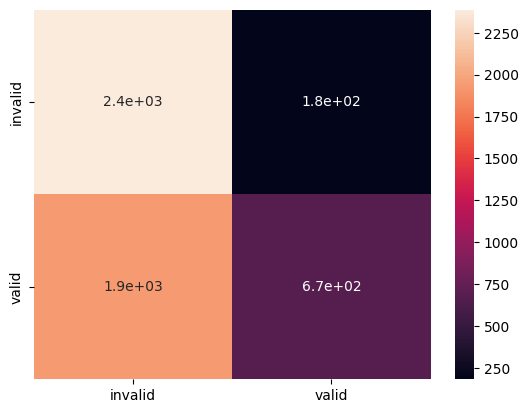

In [385]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=['invalid','valid'], yticklabels=['invalid','valid'], annot=True)

In [386]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.5910055973750241


#### Logistic regression gave the poor results, not good , lets go for SVMC

# SVMC

In [387]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [388]:
y_pred = svc.predict(X_test)

<Axes: >

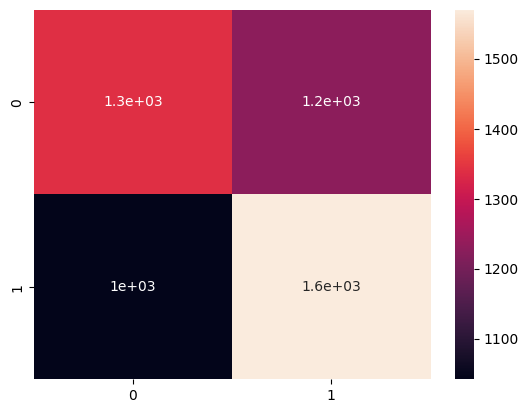

In [389]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)

In [390]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.561667631731326

### Ok its only 60% by SVMC , so lets go for ensemble learning

# RFC

In [391]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [392]:
y_pred = rfc.predict(X_test)

Accuracy of the Random forest classifier :  0.9735572283342984


<Axes: >

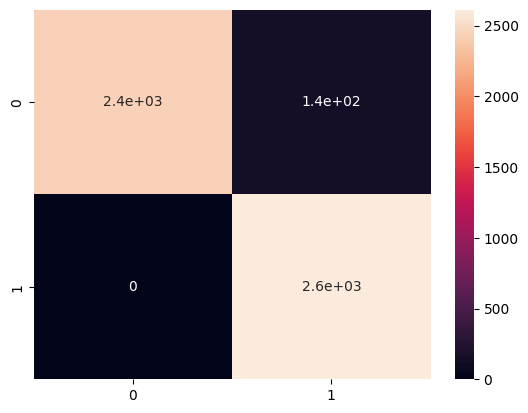

In [393]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy of the Random forest classifier : ", accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [208]:
tx = np.array([8286.35,	8288.05,	8280.80,	8280.80,	8256.468439,	8281.05,	8286.30,	0])

In [209]:
tx

array([8286.35    , 8288.05    , 8280.8     , 8280.8     , 8256.468439,
       8281.05    , 8286.3     ,    0.      ])

In [394]:
rfc.predict(np.array([1.25925000e+04, 1.25971000e+04, 1.25844500e+04, 1.25849500e+04,
        1.25842531e+04, 1.25850500e+04, 1.25891500e+04, 1.00000000e+00]).reshape(1,-1))


array([1])

In [395]:
y_train[405]

np.int64(1)

In [396]:
X_train[400:405]

array([[7.86840000e+03, 7.87860000e+03, 7.86640000e+03, 7.87770000e+03,
        7.84876973e+03, 7.86870000e+03, 7.87530000e+03, 0.00000000e+00],
       [1.03979500e+04, 1.04080500e+04, 1.03975500e+04, 1.04049000e+04,
        1.04008801e+04, 1.03982500e+04, 1.04041500e+04, 1.00000000e+00],
       [9.84925000e+03, 9.91405000e+03, 9.81800000e+03, 9.91300000e+03,
        9.85698305e+03, 9.85330000e+03, 9.86695000e+03, 1.00000000e+00],
       [8.44840000e+03, 8.45040000e+03, 8.44815000e+03, 8.44955000e+03,
        8.43007895e+03, 8.44845000e+03, 8.44890000e+03, 1.00000000e+00],
       [1.70218500e+04, 1.70409000e+04, 1.70178500e+04, 1.70355000e+04,
        1.70569694e+04, 1.70222500e+04, 1.70226000e+04, 1.00000000e+00]])

In [397]:
import joblib
# Save the model
joblib.dump(rfc, 'rfc_bullishEngulfing.joblib')

# Load the model
# loaded_rf = joblib.load('random_forest_model.joblib')

['rfc_bullishEngulfing.joblib']

In [398]:
df_bullish.columns

Index(['open', 'high', 'low', 'close', 'EMA30', 'previous_close',
       'previous_open', 'open_within_ema', 'valid_bullish_engulfing'],
      dtype='object')

# Ok lets do the same thing for Bearish engulfing

In [399]:
df_bearish = pd.read_csv('Datasets/bearish_dataset.csv')

In [400]:
df_bearish.head()

,date,open,high,low,close,EMA30,previous_close,previous_open,bearish_engulfing,open_within_ema,valid_bearish_engulfing
0,2015-01-09 09:20:00,8300.50,8303.00,8293.25,8301.00,8301.187097,8301.20,8285.45,False,True,False
1,2015-01-09 09:25:00,8301.65,8302.55,8286.80,8294.15,8300.733091,8301.00,8300.50,True,True,False
2,2015-01-09 09:30:00,8294.10,8295.75,8280.65,8288.50,8299.943859,8294.15,8301.65,False,True,False
3,2015-01-09 09:35:00,8289.10,8290.45,8278.00,8283.45,8298.879739,8288.50,8294.10,False,True,False
4,2015-01-09 09:40:00,8283.40,8288.30,8277.40,8285.55,8298.019756,8283.45,8289.10,False,True,False


In [401]:
df_bearish = df_bearish[df_bearish['bearish_engulfing']]

In [402]:
df_bearish = df_bearish.drop(columns=['date', 'bearish_engulfing'])

In [403]:
df_bearish['open_within_ema'] = df_bearish['open_within_ema'].astype('int')
df_bearish['valid_bearish_engulfing'] = df_bearish['valid_bearish_engulfing'].astype('int')

In [404]:
df_bearish.head()

,open,high,low,close,EMA30,previous_close,previous_open,open_within_ema,valid_bearish_engulfing
1,8301.65,8302.55,8286.80,8294.15,8300.733091,8301.00,8300.50,1,0
9,8285.55,8286.40,8279.95,8280.30,8293.361567,8285.50,8281.80,1,0
23,8282.55,8283.20,8276.15,8278.45,8287.689172,8282.35,8281.85,1,1
32,8259.20,8260.30,8211.20,8211.50,8271.260324,8259.10,8257.30,1,0
52,8249.20,8249.70,8239.10,8244.10,8247.408636,8249.10,8245.30,1,0


In [405]:
X = df_bearish.iloc[:, :-1].values
y = df_bearish.iloc[:, -1].values

In [406]:
X[:5]

array([[8.30165000e+03, 8.30255000e+03, 8.28680000e+03, 8.29415000e+03,
        8.30073309e+03, 8.30100000e+03, 8.30050000e+03, 1.00000000e+00],
       [8.28555000e+03, 8.28640000e+03, 8.27995000e+03, 8.28030000e+03,
        8.29336157e+03, 8.28550000e+03, 8.28180000e+03, 1.00000000e+00],
       [8.28255000e+03, 8.28320000e+03, 8.27615000e+03, 8.27845000e+03,
        8.28768917e+03, 8.28235000e+03, 8.28185000e+03, 1.00000000e+00],
       [8.25920000e+03, 8.26030000e+03, 8.21120000e+03, 8.21150000e+03,
        8.27126032e+03, 8.25910000e+03, 8.25730000e+03, 1.00000000e+00],
       [8.24920000e+03, 8.24970000e+03, 8.23910000e+03, 8.24410000e+03,
        8.24740864e+03, 8.24910000e+03, 8.24530000e+03, 1.00000000e+00]])

In [407]:
y[:5]

array([0, 0, 1, 0, 0])

In [408]:
from collections import Counter
Counter(y)

Counter({np.int64(0): 8450, np.int64(1): 625})

#### So again we need to do the oversampling

In [409]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X,y)

In [410]:
Counter(y_ros)

Counter({np.int64(0): 8450, np.int64(1): 8450})

In [411]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, random_state=0, test_size=0.3)

# RFC

In [412]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [413]:
y_pred= rfc.predict(X_test)

Accuracy of the Random Forest Classifier :  0.9646942800788955


<Axes: >

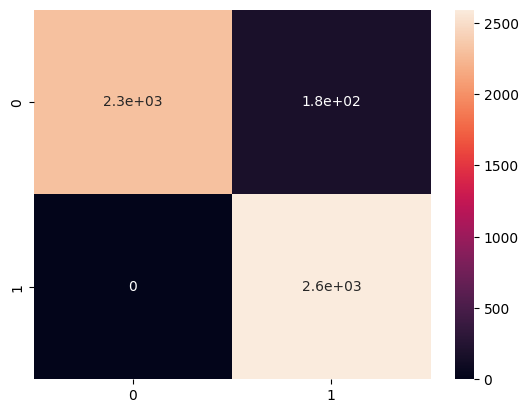

In [414]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
print('Accuracy of the Random Forest Classifier : ', accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [415]:
import joblib
# Save the model
joblib.dump(rfc, 'rfc_bearishEngulfing.joblib')

# Load the model
# loaded_rf = joblib.load('random_forest_model.joblib')

['rfc_bearishEngulfing.joblib']

#### So we done with the model training we got the two models for predictions

#### rfc_bullishEngulfing has the accuracy of 97.4.%
#### rfc_bearishEngulfing has the accuracy of 96.5%

In [416]:
df_bullish.columns

Index(['open', 'high', 'low', 'close', 'EMA30', 'previous_close',
       'previous_open', 'open_within_ema', 'valid_bullish_engulfing'],
      dtype='object')

In [426]:
rfc = joblib.load('rfc_bullishEngulfing.joblib')
rfc.predict(np.array([24632, 24639.95, 24611.45, 24616.55, 24602.08, 24616.75, 24626.5, 1]).reshape(1,-1))

array([0])

In [427]:
rfc.predict(np.array([24545.10, 24549.00, 24533.30, 24535.60, 24581.42, 24535.85, 24538.60, 1]).reshape(1,-1))

array([0])

In [428]:
rfc.predict(np.array([24382.25, 24383.30, 24366.85, 24375.35, 24362.12, 24375.50, 24377.30, 1]).reshape(1,-1))

array([0])

In [429]:
rfc.predict(np.array([21617.55,21629.60,	21614.60,	21625.75,	21587.664712,	21617.75,	21623.70,	1]).reshape(1,-1))



array([1])

### Ok we are experiencing the problem of old relation that model trained is not properly be able to apply on the recent data.
### So decided to use the latest data, but didn't got the 5 min candle data, instead got 1 min, so we need to convert
**now instead of doing it below i do it above so that the flow continuous**

In [289]:
df = pd.read_csv('Datasets/NIFTY 50 - Minute data.csv')

In [290]:
df.head()

,date,open,high,low,close,volume
0,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0
1,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0
2,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0
3,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0
4,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0


In [420]:
df_bullish.head()

,open,high,low,close,EMA30,previous_close,previous_open,open_within_ema,valid_bullish_engulfing
30,8254.70,8257.65,8254.15,8257.65,8276.504603,8254.80,8255.95,0,0
45,8258.70,8270.60,8256.75,8269.85,8249.175980,8259.35,8265.80,1,0
59,8224.75,8243.55,8224.75,8242.10,8240.480801,8225.20,8229.95,1,0
72,8280.80,8288.05,8280.80,8286.35,8256.468439,8281.05,8286.30,0,0
81,8270.30,8283.70,8269.90,8274.60,8261.475044,8270.50,8271.05,1,0


In [424]:
df_bullish[df_bullish['valid_bullish_engulfing']==1]

,open,high,low,close,EMA30,previous_close,previous_open,open_within_ema,valid_bullish_engulfing
131,8281.40,8291.40,8281.40,8290.55,8275.663767,8282.00,8282.30,1,1
142,8303.50,8309.85,8303.15,8305.85,8291.180860,8303.80,8304.90,1,1
192,8327.15,8331.40,8326.80,8330.65,8333.159435,8327.20,8328.60,1,1
326,8431.80,8444.90,8430.80,8442.00,8398.102707,8431.95,8432.75,0,1
336,8458.95,8463.10,8457.55,8460.65,8428.043691,8459.05,8459.45,0,1
...,...,...,...,...,...,...,...,...,...
166398,21617.55,21629.60,21614.60,21625.75,21587.664712,21617.75,21623.70,1,1
166620,21725.75,21746.45,21725.30,21738.90,21678.319964,21727.05,21727.60,1,1
166924,21294.65,21337.85,21294.65,21324.15,21496.084565,21294.90,21315.85,0,1
167274,21329.45,21342.50,21309.45,21340.70,21302.878023,21330.10,21338.05,1,1


### For Fine tunning the data on the recent data the below block could be useful

In [ ]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import joblib

# # Load the old model
# old_model_path = 'random_forest_model.joblib'
# old_rf = joblib.load(old_model_path)

# # Load recent stock data (assuming 'data_recent.csv' is the recent dataset)
# # The dataset should have the same structure as the old one
# recent_data = pd.read_csv('data_recent.csv')

# # Define features and target (assuming the same features and target as the old model)
# X_recent = recent_data[['feature1', 'feature2', 'feature3']]  # Update with actual feature names
# y_recent = recent_data['target']  # Update with actual target name

# # Combine old data (optional)
# # Load old data if available (assuming 'data_old.csv' is the old dataset)
# old_data = pd.read_csv('data_old.csv')
# X_old = old_data[['feature1', 'feature2', 'feature3']]  # Update with actual feature names
# y_old = old_data['target']  # Update with actual target name

# # Combine old and new data
# X_combined = pd.concat([X_old, X_recent], ignore_index=True)
# y_combined = pd.concat([y_old, y_recent], ignore_index=True)

# # Split the combined data
# X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# # Fine-tune the existing Random Forest model
# old_rf.fit(X_train_combined, y_train_combined)

# # Save the fine-tuned model
# fine_tuned_model_path = 'random_forest_model_fine_tuned.joblib'
# joblib.dump(old_rf, fine_tuned_model_path)

# # Load the fine-tuned model for predictions
# loaded_rf_fine_tuned = joblib.load(fine_tuned_model_path)

# # Predict on the test set with the fine-tuned model
# y_pred_combined = loaded_rf_fine_tuned.predict(X_test_combined)

# # Evaluate the fine-tuned model
# accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
# print(f'Accuracy on combined data: {accuracy_combined:.2f}')


## Ok alright, the recent data is must for the model to predict properly so i should immediately develop the backend which will call the api for every 5 min identify whether it is bullish or bearish engulfing and accordingly push then into the database. 
## like this the new recent dataset will be created by me own. and then i will fine tune the model to get the results.